### Task 4 :- Exploratory Data Analysis - Terrorism

####Perform 'Exploratory data Analysis' on dataset 'Global Terrorism'. As a Security/Defence analyst try to find out the hot zone of Terrorism

### Dataset :- globalterrorismdb_0718dist.csv https://bit.ly/2TK5Xn5

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Loading to dataframe

In [2]:
data_url = "globalterrorismdb_0718dist.csv"
df = pd.read_csv(data_url, encoding='ISO-8859-1')
pd.set_option("display.max_columns", None)
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
print("Shape before deleting duplicate values: {}.\n\n".format(df.shape))

Shape before deleting duplicate values: (181691, 135).




In [4]:
# Removing duplicate rows if any
df=df.drop_duplicates()
print("Shape After deleting duplicate values: {}.\n\n".format(df.shape))


Shape After deleting duplicate values: (181691, 135).




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 188.5+ MB


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# check null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
df.rename(columns={'iyear':'Year',
                     'imonth':'Month',
                     'iday':'Day',
                     'country_txt':'Country',
                     'provstate':'state',
                     'region_txt':'Region',
                     'attacktype1_txt':'AttackType',
                     'attacktype1':'AttackSeverity',
                     'target1':'Target',
                     'nkill':'Killed',
                     'nwound':'Wounded',
                     'gname':'Group',
                     'targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type',
                     'motive':'Motive'
                     },inplace=True)

In [9]:
new_df=df[['eventid',
           'Year',
           'Month',
           'Day',
           'Country',
           'state',
           'Region',
           'city',
           'latitude',
           'longitude',
           'AttackType',
           'AttackSeverity',
           'Killed',
           'Wounded',
           'Target',
           'summary',
           'Group',
           'Target_type',
           'Weapon_type',
           'Motive']] .copy()

In [11]:
new_df.head()

,eventid,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,AttackSeverity,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),6,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,3,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,7,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


#EDA

In [ ]:
new_df.describe()

,Year,Month,Day,latitude,longitude,AttackSeverity,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,3.247547,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,1.915772,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,2.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,3.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,3.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,9.000000,1570.000000,8191.000000


In [ ]:
# check null values
new_df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
state                421
Region                 0
city                 434
latitude            4556
longitude           4557
AttackType             0
AttackSeverity         0
Killed             10313
Wounded            16311
Target               636
summary            66129
Group                  0
Target_type            0
Weapon_type            0
Motive            131130
dtype: int64

In [ ]:
# replace null values with 0 
new_df['Wounded'] = new_df['Wounded'].fillna(0)
new_df['Killed'] = new_df['Killed'].fillna(0)

# Number of Terrorist Attacks for each year

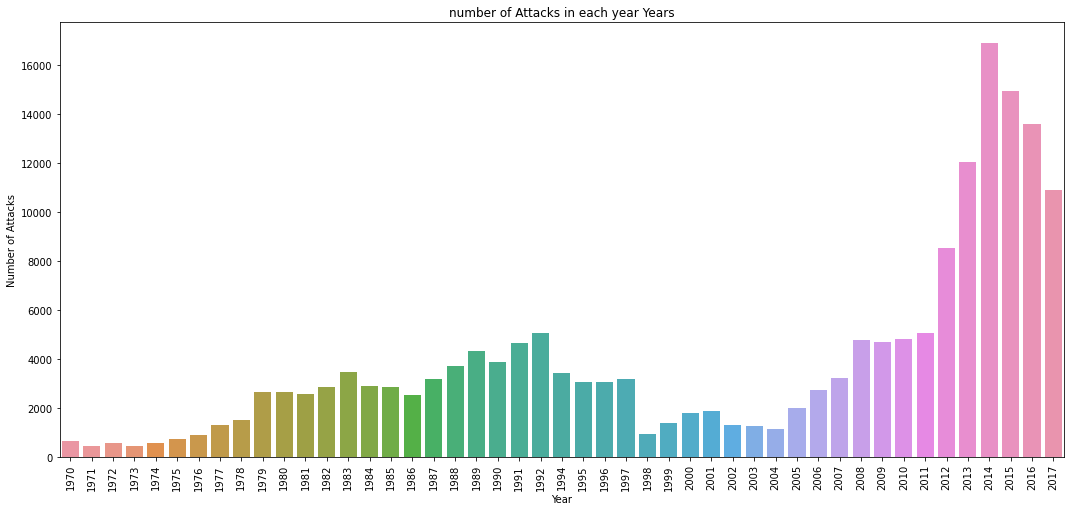

In [ ]:
# Attacks in year
year = new_df['Year'].unique()
years_count = new_df['Year'].value_counts().sort_index()

plt.figure(figsize= (18, 8))
sns.barplot(x= year, y = years_count )
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('number of Attacks in each year Years')
plt.show()

## ==> so 2014 and 2015 has the highest number of Terrorist attacks 

##Terrorist Activities By Region in each year 

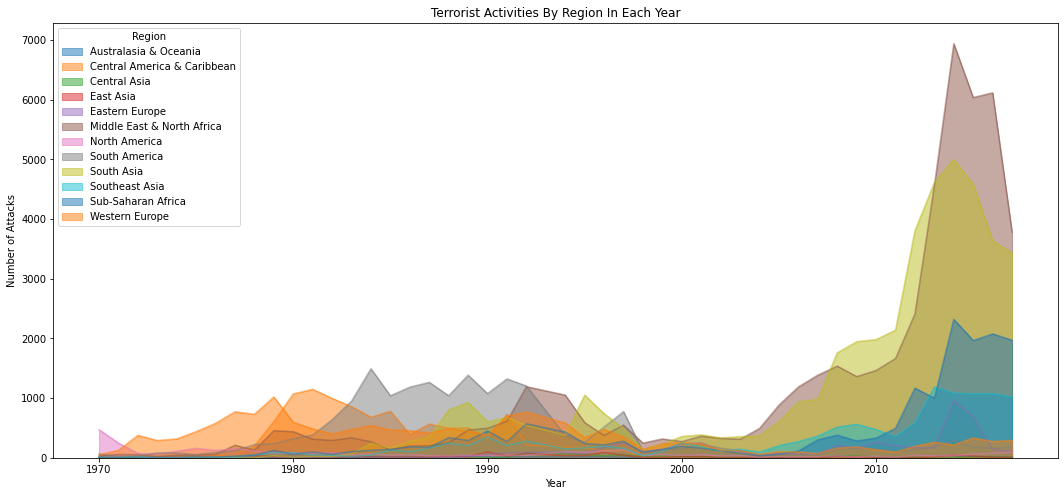

In [ ]:

pd.crosstab(new_df.Year, new_df.Region).plot(kind='area',stacked=False,figsize=(18,8))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.xlabel("Year")
plt.show()

#==>  Middle East & North Africa Region has more attacks.

## number of terrorist attack in each region 

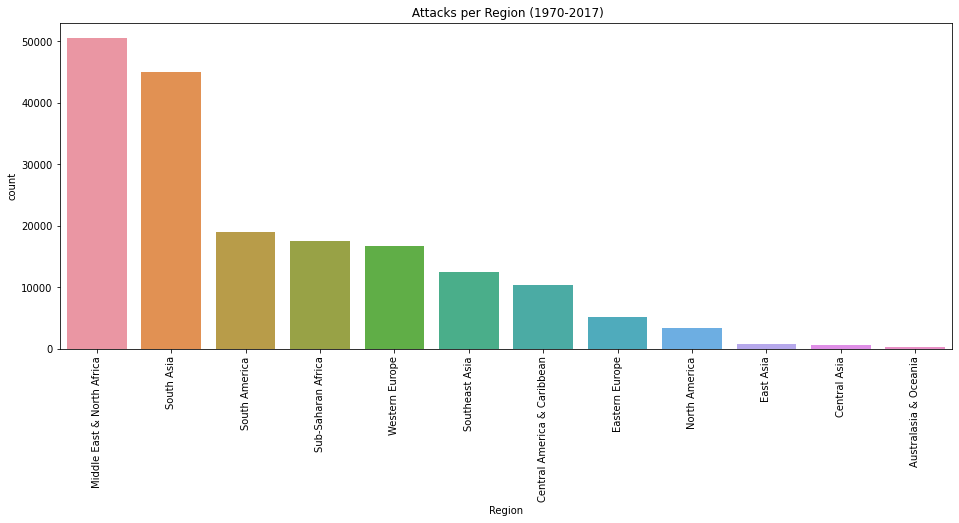

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Region', data=new_df ,order=new_df['Region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(' Attacks per Region (1970-2017)')
plt.show()

## number of terrorist attack in each Country 

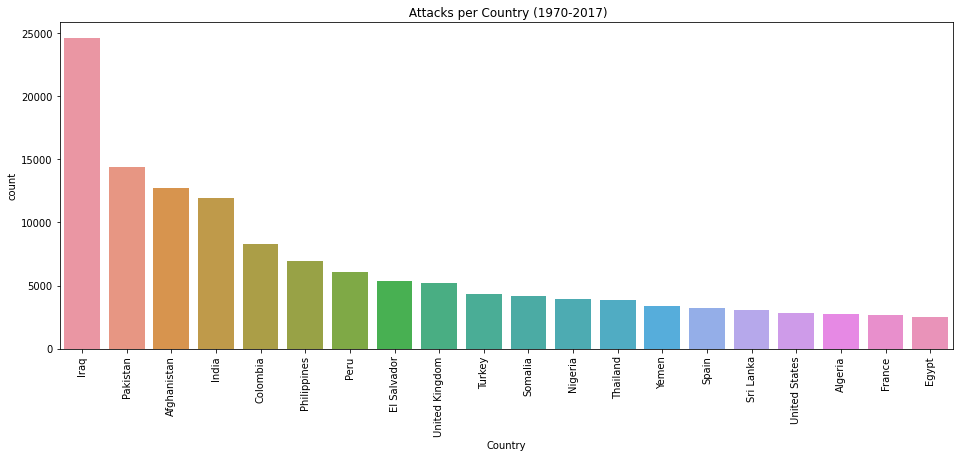

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Country', data=new_df ,order=new_df['Country'].value_counts()[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(' Attacks per Country (1970-2017)')
plt.show()


## number of terrorist attack in top 20 cities  

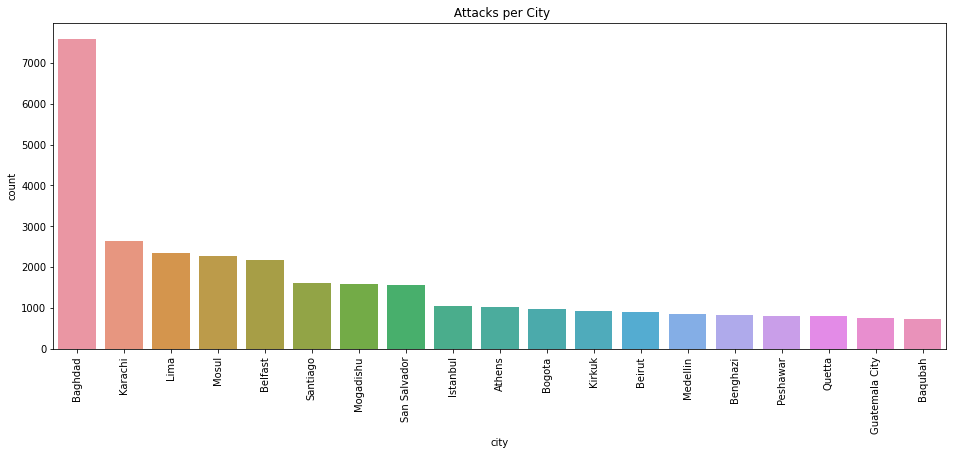

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='city', data=new_df ,order=new_df['city'].value_counts()[:20].drop('Unknown').index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(' Attacks per City')
plt.show()


## Type of attack

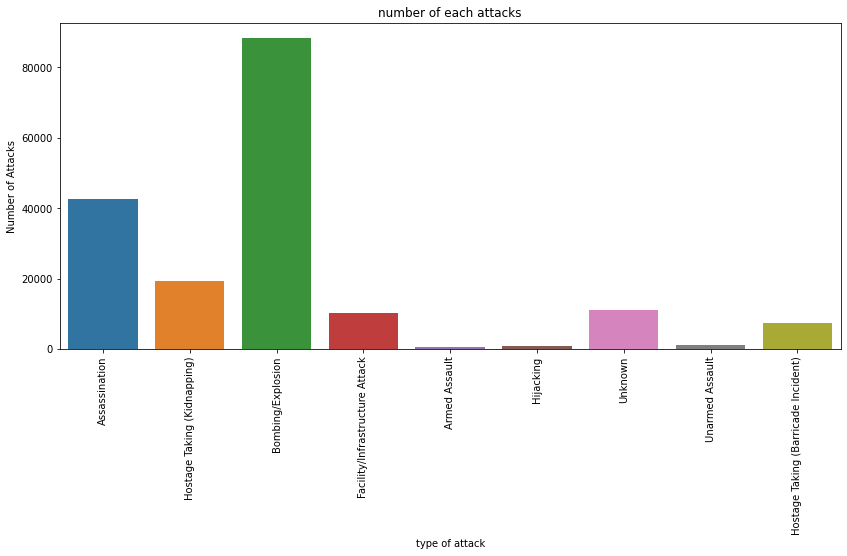

In [ ]:

attack = new_df['AttackType'].unique()
attack_count = new_df['AttackType'].value_counts().sort_index()
plt.figure(figsize= (14, 6))
sns.barplot(x= attack, y = attack_count )
plt.xticks(rotation = 90)
plt.xlabel('type of attack')
plt.ylabel('Number of Attacks')
plt.title('number of each attacks')
plt.show()

# ==> so most of the attacks are Bombing/Explosion then Assassination
 

## number of killed by each attack 

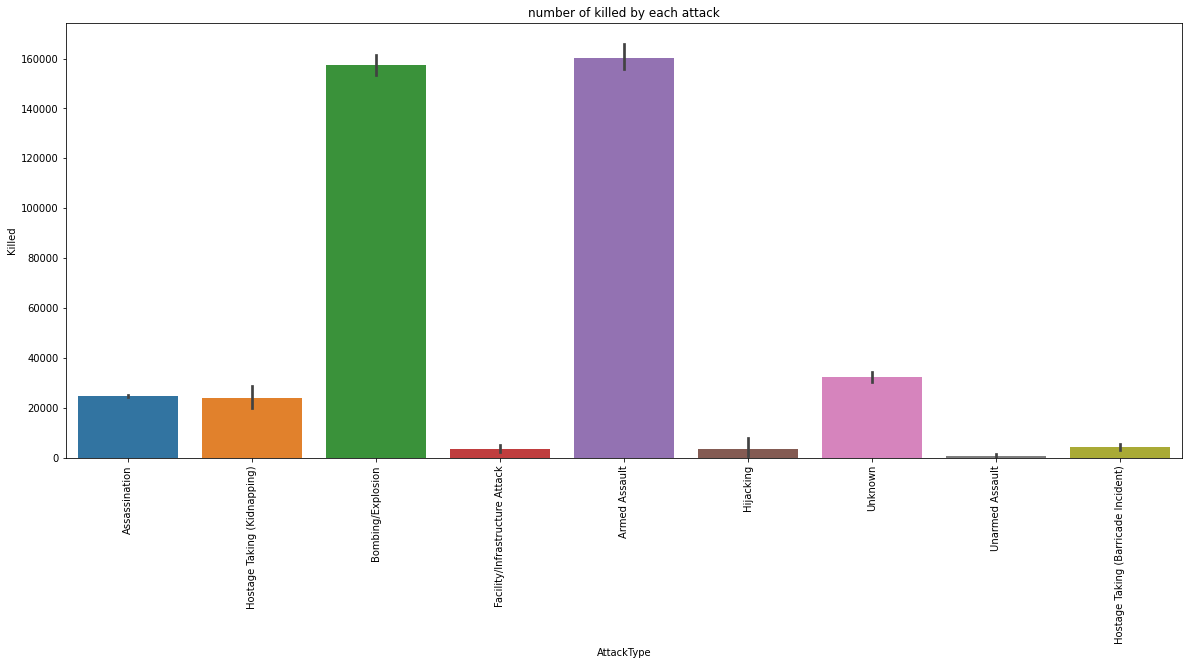

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))

sns.barplot(data=new_df,x='AttackType',y='Killed', estimator=sum)
ax.set_title('number of killed by each attack')
plt.xticks(rotation = 90)
plt.show()

## ==> number of killed in armed assault is much higher than Bombing 

##number of Wounded by each attack

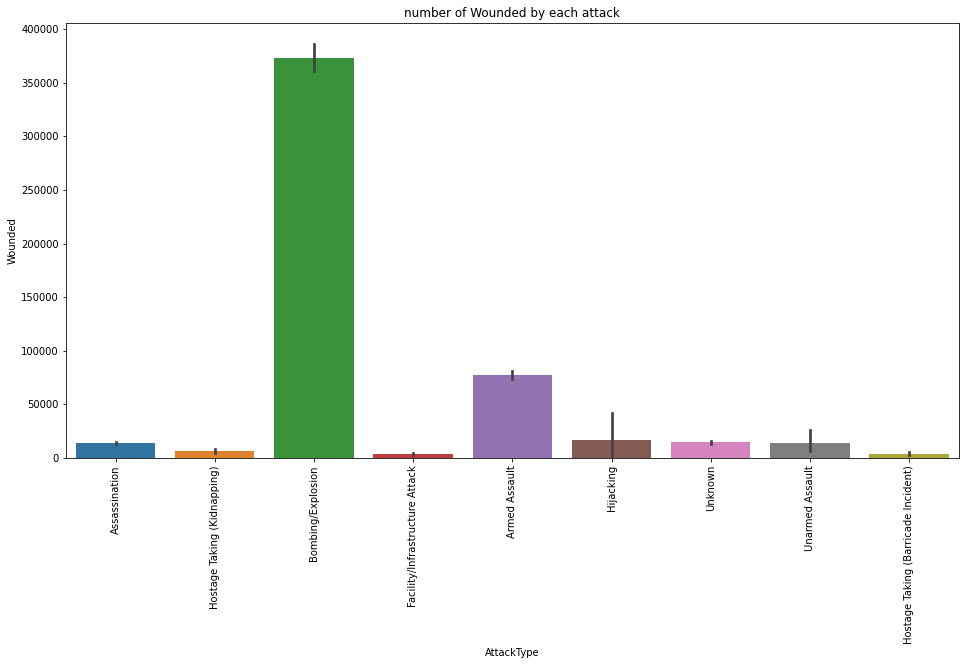

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))

sns.barplot(data=new_df,x='AttackType',y='Wounded', estimator=sum)
ax.set_title('number of Wounded by each attack')
plt.xticks(rotation = 90)
plt.show()

## Type of target

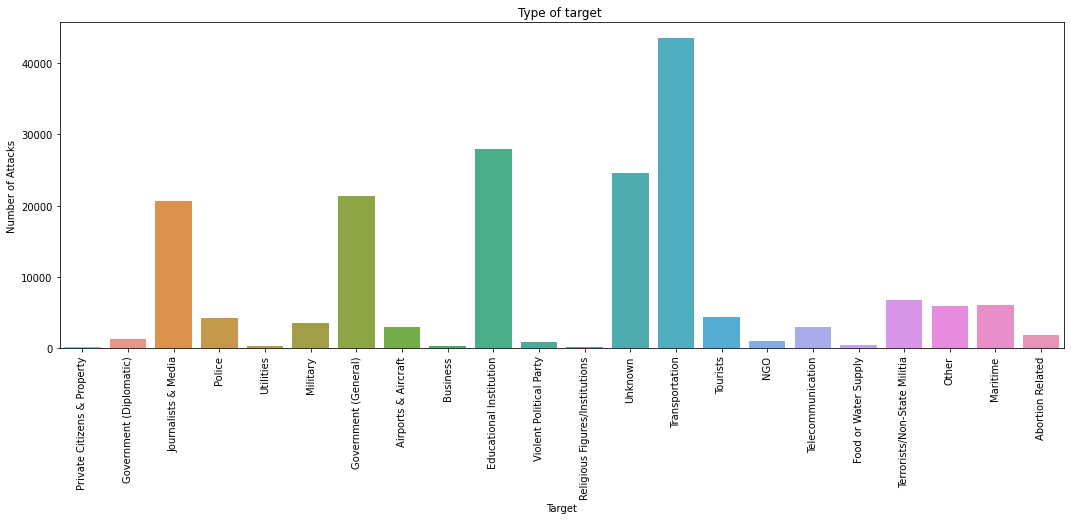

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(new_df['Target_type'],order=new_df['Target_type'].value_counts().index )
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()


#top 10 Terrorist Group per attack

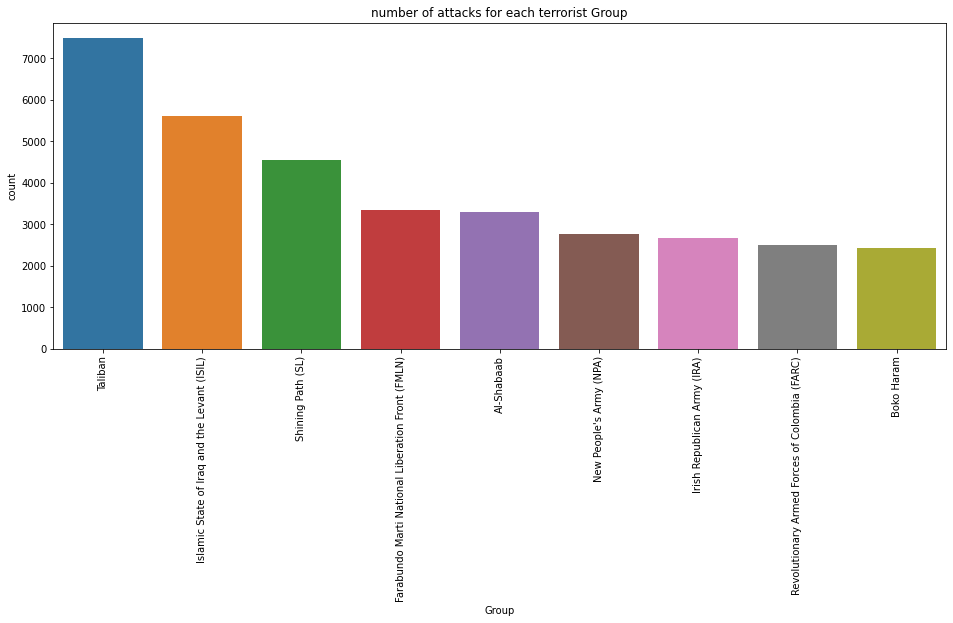

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Group', data=new_df ,order=new_df['Group'].value_counts()[:10].drop('Unknown').index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('number of attacks for each terrorist Group')
plt.show()


# Conclusions

- Iraq has the most attacks

- City with most attack : Baghdad

- Region with most attack : Middle East and North Africa

-  2014 and 2015 has the highest number of Terrorist attacks

- Group with most attack : Taliban

- Most attack types : Bombing/Explosion then Assassination

- number of killed in armed assault is much higher than Bombing